In [1]:
!head all_predicted_ddGs.csv

flank,Cbf1_ddG,Pho4_ddG
AAAAAAAAAA,0.2923902047805207,0.27621988085974986
AAAAAAAAAC,0.23492399584573675,0.2673280599521571
AAAAAAAAAG,0.2715614212684052,0.2624937060283595
AAAAAAAAAT,0.29364002477449347,0.2816373470233851
AAAAAAAACA,0.2145185543231385,0.2418136510061198
AAAAAAAACC,0.17136610280794073,0.2282033029006892
AAAAAAAACG,0.20359680783075262,0.23518616585006052
AAAAAAAACT,0.24050287138742377,0.251138901989358
AAAAAAAAGA,0.2692283166579621,0.2758133771823817


In [2]:
import json

flankToDdG = {}
firstLine = True
with open("all_predicted_ddGs.csv") as inp:
    for line in inp:
        if firstLine:
            firstLine = False
            continue
        flank = line.strip().split(',')[0]
        ddG = float(line.strip().split(',')[2])
        flankToDdG[flank] = ddG

with open('FlankToDdG.json', 'w') as fp:
    json.dump(flankToDdG, fp, sort_keys=True, indent=4)

In [1]:
import json

with open('FlankToDdG.json') as f:
    flankToDdG = json.load(f)
with open('FlankToDeltaLogCount.json') as f:
    flankToDeltaLogCount = json.load(f)

In [2]:
len(flankToDdG.keys())

1048576

In [3]:
len(flankToDeltaLogCount.keys())

1048576

In [4]:
xvals = []
yvals = []
for key in flankToDdG.keys():
    xvals.append(flankToDdG[key])
    yvals.append(flankToDeltaLogCount[key])

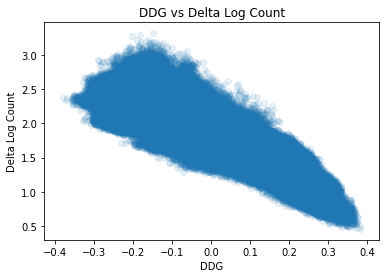

SpearmanrResult(correlation=-0.8742662910605821, pvalue=0.0)


In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.stats import spearmanr, pearsonr

plt.scatter(xvals, yvals, alpha=0.1)
plt.xlabel("DDG")
plt.ylabel("Delta Log Count")
plt.title("DDG vs Delta Log Count")
plt.show()
print(spearmanr(xvals,yvals))